In [1]:
# import sys
# !{sys.executable} -m pip install yellowbrick

import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pickle5 as pickle
pd.set_option('display.max_columns', None)

2023-05-06 18:49:05.758974: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-06 18:49:05.802651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 18:49:06.405902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [49]:
parameterization = '4'
aw = pd.read_pickle(
    'model_weights/architecture_weights_4.pkl')

In [50]:
(np.mean(aw['IQR']) / 1.5) 

0.4035907410782849

In [62]:
df = gl.load_notebook_data(
    parameterization = '4',
#     pth = '/data/fast1/glacierml/data/'
)
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3)
0,RGI60-01.00001,42.329163,40.829075,17.774538,42.250946,5.330348,0.000619,0.022858,1.758990,92.087355,8.426555,4.284539,2.945355,2.228903,293.555719,266.375041,0.015210,17.147952,17.373273,0.977839,1.403805e-24,22.393700,4025.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196
1,RGI60-01.00002,65.017494,64.454842,12.893505,64.858046,-2.502357,0.000401,0.011739,4.234247,207.829045,20.714311,10.614495,7.189797,5.438083,687.452338,266.375041,0.036191,12.887887,12.357562,0.991608,1.123248e-14,16.607788,4025.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413
2,RGI60-01.00003,64.667038,63.936592,13.213099,64.511261,-0.044015,-0.005770,0.012367,4.189037,206.599969,20.495456,10.494210,7.108715,5.374268,680.109798,266.375041,0.108701,13.328801,12.734462,0.990523,9.140342e-16,17.279205,4025.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688
3,RGI60-01.00004,70.265610,69.803032,13.985704,70.098777,-9.131564,0.001338,0.013813,4.949596,248.591953,24.356273,12.429495,8.393453,6.335437,802.815864,266.375041,0.258034,13.597259,13.528556,0.993316,9.428541e-13,17.838818,4025.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319
4,RGI60-01.00005,70.848854,70.529549,13.393655,70.676933,-9.292901,0.001424,0.012593,5.032147,250.963429,24.770687,12.655802,8.545819,6.452554,816.101733,266.375041,0.181852,12.459785,12.795735,0.994704,6.127921e-11,16.795216,4025.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,35.898376,35.064503,9.786620,35.869876,11.882072,0.001889,0.006953,1.283086,67.305062,6.333289,3.233153,2.195979,1.658806,210.638763,266.375041,0.001507,9.634790,10.937231,0.991746,1.570463e-14,13.292896,4025.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529
216497,RGI60-19.02749,45.766666,46.015816,6.605012,45.746815,5.185685,0.000378,0.003086,2.110583,118.012226,10.541837,5.331865,3.568650,2.684698,341.331837,266.375041,0.025938,6.097812,6.066629,0.987532,2.212324e-18,7.905735,4025.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642
216498,RGI60-19.02750,68.989281,70.057808,7.536087,68.909106,-9.442056,0.001228,0.003722,4.802264,263.849853,24.274953,12.260929,8.158357,6.104984,774.155378,266.375041,0.283768,5.158432,6.256610,0.915215,8.477856e-43,7.364868,4025.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293
216499,RGI60-19.02751,105.089897,108.702805,14.895259,104.844227,-32.054810,0.013983,0.011478,11.050330,597.871706,56.000671,28.573568,19.001228,14.275411,1796.390081,266.375041,0.001153,6.881970,9.885336,0.719737,0.000000e+00,10.367699,40

In [63]:
thicknesses = df['Weighted Mean Thickness']
thicknesses

0          42.250946
1          64.858046
2          64.511261
3          70.098777
4          70.676933
             ...    
216496     35.869876
216497     45.746815
216498     68.909106
216499    104.844227
216500     62.324112
Name: Weighted Mean Thickness, Length: 216501, dtype: float64

In [64]:
uncertainties = np.sqrt(df['Weighted Deviation Uncertainty'])
uncertainties

0         17.133468
1         26.219312
2         26.078915
3         28.334005
4         28.567494
            ...    
216496    14.513399
216497    18.475168
216498    27.823648
216499    42.383842
216500    25.160459
Name: Weighted Deviation Uncertainty, Length: 216501, dtype: float64

In [65]:
np.sqrt(np.sum( (np.sqrt(uncertainties)*0.001 * df.Area)**2 ))

286.70489730506785

In [66]:
vol_unc = (uncertainties / 1e3) * df['Area']

sum_vol_unc = sum(vol_unc**2)

np.sqrt(sum_vol_unc) / 1e3

3.7094258317774536

In [67]:
n=len(uncertainties)
alpha=0.05
qhat = np.percentile(uncertainties,np.ceil((n+1)*(1-alpha))/n, interpolation='higher')
qhat

9.242720916504798

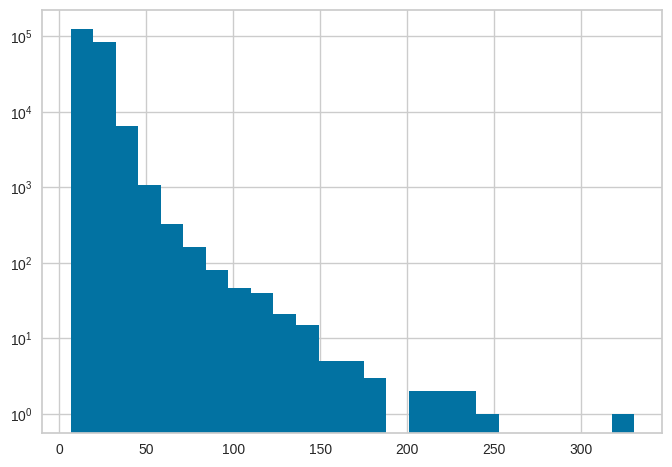

In [68]:
plt.hist(uncertainties,density=False, bins = 25)
plt.yscale('log')
plt.show()

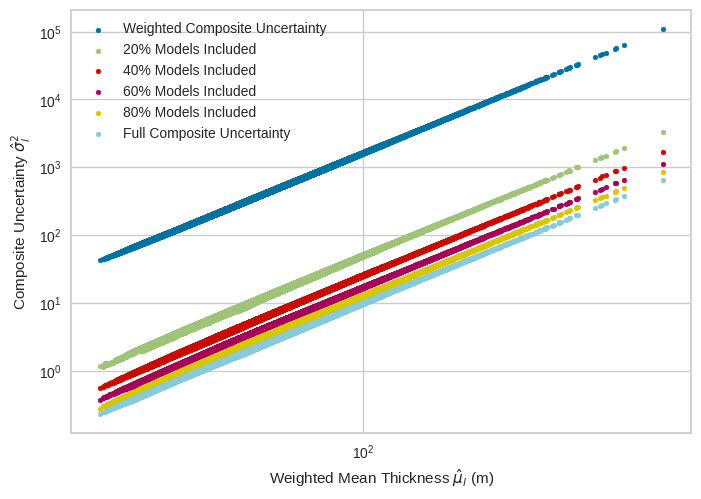

In [69]:
plt.scatter(
    df['Weighted Mean Thickness'],
    df['Weighted Deviation Uncertainty'],
    marker = '.',
    label = 'Weighted Composite Uncertainty'
)

plt.scatter(
    df['Weighted Mean Thickness'],
    df['Composite Deviation Uncertainty 20'],
    marker = '.',
    label = '20% Models Included'

)
plt.scatter(
    df['Weighted Mean Thickness'],
    df['Composite Deviation Uncertainty 40'],
    marker = '.',
    label = '40% Models Included'

)
plt.scatter(
    df['Weighted Mean Thickness'],
    df['Composite Deviation Uncertainty 60'],
    marker = '.',
    label = '60% Models Included'

)
plt.scatter(
    df['Weighted Mean Thickness'],
    df['Composite Deviation Uncertainty 80'],
    marker = '.',
    label = '80% Models Included'

)
plt.scatter(
    df['Weighted Mean Thickness'],
    df['Composite Deviation Uncertainty'],
    marker = '.',
    label = 'Full Composite Uncertainty'
)




plt.yscale('log')
plt.xscale('log')
plt.xlabel('Weighted Mean Thickness $\hat{\mu}_{l}$ (m)')
plt.ylabel('Composite Uncertainty $\hat{\sigma}_{l}^{2}$')
plt.legend()

In [22]:
np.sqrt(df['Weighted Deviation Uncertainty'])

0         17.135500
1         26.220174
2         26.079861
3         28.334908
4         28.568261
            ...    
216496    14.514307
216497    18.475696
216498    27.823557
216499    42.382461
216500    25.160099
Name: Weighted Deviation Uncertainty, Length: 216501, dtype: float64

In [70]:
df['VolSTD'] = df['Area'] * (np.sqrt(df['Weighted Deviation Uncertainty']) / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.193 +/- 3.709 * 10^3 km^3, 2.806% uncertainty


In [20]:
df['VolSTD'] = df['Area'] * np.sqrt(92.6) / 1e3

# (np.sqrt(df['Weighted Deviation Uncertainty']) / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)


print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 8000693030.277402 +/- 0.229 * 10^3 km^3, 0.0% uncertainty


In [27]:
df['VolSTD'] = df['Area'] * (df['Thickness Std Dev'] / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.187 +/- 1.899 * 10^3 km^3, 1.437% uncertainty


In [4]:
dev_vol_var = (df['Area'] * np.sqrt(df['Composite Deviation Uncertainty']) / 1e3)**2
bootstrap_vol_var = (df['Area'] * np.sqrt(df['Bootstrap Uncertainty']) / 1e3)**2
MAE_vol_var = (df['Area'] * np.sqrt(df['MAE Uncertainty']) / 1e3)**2

df['VolSTD'] = np.sqrt(
#     dev_vol_var + 
    bootstrap_vol_var 
#     MAE_vol_var
)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.187 +/- 0.013 * 10^3 km^3, 0.01% uncertainty


# Applying the Residual Correction Factor

In [5]:
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),VolSTD,VolUnc
0,RGI60-01.00001,42.329163,40.829075,17.774538,42.256065,5.330348,0.000619,0.022858,0.105064,266.375041,0.015212,17.147952,17.373273,0.977839,1.403818e-24,22.393700,4025.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196,0.000054,0.357790
1,RGI60-01.00002,65.017494,64.454842,12.893505,64.860148,-2.502357,0.000401,0.011739,0.162447,266.375041,0.036192,12.887887,12.357562,0.991609,1.124679e-14,16.607788,4025.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413,0.000060,0.167049
2,RGI60-01.00003,64.667038,63.936592,13.213099,64.513577,-0.044015,-0.005770,0.012367,0.161574,266.375041,0.108705,13.328801,12.734462,0.990523,9.137704e-16,17.279205,4025.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688,0.000187,0.172379
3,RGI60-01.00004,70.265610,69.803032,13.985704,70.100972,-9.131564,0.001338,0.013813,0.175608,266.375041,0.258042,13.597259,13.528556,0.993317,9.464015e-13,17.838818,4025.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319,0.000433,0.167654
4,RGI60-01.00005,70.848854,70.529549,13.393655,70.678780,-9.292901,0.001424,0.012593,0.177068,266.375041,0.181857,12.459785,12.795735,0.994704,6.132926e-11,16.795216,4025.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744,0.000289,0.158771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,35.898376,35.064503,9.786620,35.872132,11.882072,0.001889,0.006953,0.089518,266.375041,0.001507,9.634790,10.937231,0.991746,1.569561e-14,13.292896,4025.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529,0.000004,0.232454
216497,RGI60-19.02749,45.766666,46.015816,6.605012,45.748139,5.185685,0.000378,0.003086,0.114574,266.375041,0.025939,6.097812,6.066629,0.987531,2.209954e-18,7.905735,4025.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642,0.000031,0.121428
216498,RGI60-19.02750,68.989281,70.057808,7.536087,68.908852,-9.442056,0.001228,0.003722,0.172787,266.375041,0.283767,5.158432,6.256610,0.915216,8.491869e-43,7.364868,4025.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293,0.000251,0.088540
216499,RGI60-19.02751,105.089897,108.702805,14.895259,104.840490,-32.054810,0.013983,0.011478,0.262517,266.375041,0.001153,6.881970,9.885336,0.719738,0.000000e+00,10.367699,4025.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112,0.000001,0.102188


# Compare with survey thickness

In [58]:
glac = gl.load_training_data(RGI_input = 'y')
glac = glac[['RGIId', 'Thickness']]

df = pd.merge(df, glac, on = 'RGIId', how = 'inner')

df['Residual'] = df['Weighted Mean Thickness'] - df['Thickness']
df['F Residual'] = df['Farinotti Mean Thickness'] - df['Thickness']

df['P Residual'] = (df['Weighted Mean Thickness'] - df['Thickness']) / df['Thickness']
df['F P Residual'] =(df['Farinotti Mean Thickness'] - df['Thickness']) / df['Thickness']

df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),VolSTD,VolUnc,Thickness,Residual,F Residual,P Residual,F P Residual
0,RGI60-01.00037,209.310257,216.130905,40.039093,208.579732,-94.797246,0.118873,0.080467,43.391821,2219.381482,220.431017,112.556576,74.872305,56.009871,7129.938624,266.375041,48.929259,16.951636,26.560076,0.720072,0.000000e+00,28.533295,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,19.807945,40.482823,235.0,-26.420268,-13.631260,-0.112427,-0.058005
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.268376,-23.045132,0.007220,0.015211,8.210264,424.174276,41.023863,20.831006,13.971216,10.509554,1331.122730,266.375041,1.585745,11.444828,13.472248,0.953788,6.639497e-34,16.051460,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,0.640924,40.417870,147.0,-56.731624,-71.343210,-0.385929,-0.485328
2,RGI60-01.01104,90.167320,91.284256,15.082670,89.925274,-22.710686,0.007064,0.015024,8.142304,412.393305,40.619553,20.695757,13.915503,10.465320,1321.482280,266.375041,0.856808,11.012299,13.168570,0.951711,1.637178e-34,16.129356,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,0.346364,40.424895,66.0,23.925274,44.901680,0.362504,0.680328
3,RGI60-01.02236,51.709263,50.033535,13.439234,51.610633,-0.005361,-0.000051,0.012848,2.674014,132.600786,12.973928,6.622860,4.504928,3.409066,435.530692,266.375041,0.007896,12.636050,12.552254,0.984227,8.469930e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,0.003193,40.436187,83.0,-31.389367,-60.614202,-0.378185,-0.730292
4,RGI60-01.02236,51.709263,50.033535,13.439234,51.610633,-0.005361,-0.000051,0.012848,2.674014,132.600786,12.973928,6.622860,4.504928,3.409066,435.530692,266.375041,0.007896,12.636050,12.552254,0.984227,8.469930e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,0.003193,40.436187,82.0,-30.389367,-59.614202,-0.370602,-0.727002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,107.371895,110.740059,15.851901,107.124577,-33.559400,0.015259,0.013589,11.535520,625.097677,58.379903,29.808460,19.809349,14.880969,1875.379784,266.375041,0.022818,8.407259,11.557926,0.770130,0.000000e+00,12.710632,4025.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,0.009224,40.425509,312.0,-204.875423,-296.382699,-0.656652,-0.949945
496,RGI60-19.01950,97.799950,101.289764,12.548057,97.611792,-27.974227,0.010444,0.007735,9.607995,521.614170,48.725672,24.737144,16.416484,12.298414,1555.432186,266.375041,0.706709,4.821858,7.778112,0.656968,0.000000e+00,7.245644,4025.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,0.285538,40.403897,238.0,-140.3882

In [59]:
mean_residual = np.round(df['Residual'].mean(), 3)
mean_residual_unc = np.round(df['Residual'].std(), 3)

mean_residual_f = np.round(df['F Residual'].mean(), 3)
mean_residual_f_unc = np.round(df['F Residual'].std(), 3)

print(
    f'This study mean residual: {mean_residual} +/- {mean_residual_unc} m\n'
    f'Farinotti mean residual: {mean_residual_f} +/- {mean_residual_f_unc} m'

)

This study mean residual: -9.717 +/- 49.824 m
Farinotti mean residual: -3.494 +/- 54.105 m


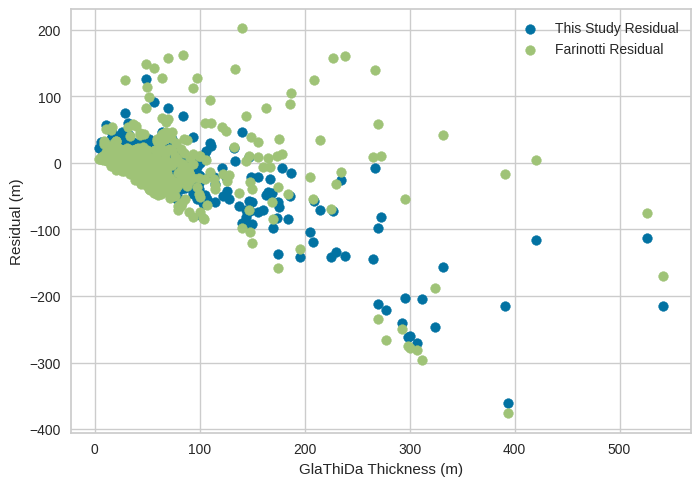

In [60]:
plt.scatter(
    df['Thickness'],
    df['Residual'],
    label = 'This Study Residual'
)
plt.scatter(
    df['Thickness'],
    df['F Residual'],
    label = 'Farinotti Residual'
)

plt.ylabel('Residual (m)')
plt.xlabel('GlaThiDa Thickness (m)')
plt.legend()